In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("training_data.csv")

In [3]:
df.head(5)

,text,label
0,Wall St. Bears Claw Back Into the Black (Reute...,2
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2
3,Iraq Halts Oil Exports from Main Southern Pipe...,2
4,"Oil prices soar to all-time record, posing new...",2


In [4]:
df.shape

(120000, 2)

# # data cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    120000 non-null  object
 1   label   120000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ MB


In [6]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [7]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [8]:
df.duplicated().sum()

0

# EDA

In [9]:
df['label'].value_counts()

2    30000
3    30000
1    30000
0    30000
Name: label, dtype: int64

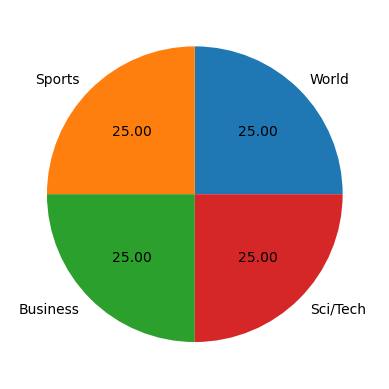

In [10]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(),autopct="%0.2f",labels=['World', 'Sports', 'Business' , 'Sci/Tech'])
plt.show()

In [11]:
import nltk

In [12]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Nithin
[nltk_data]     V\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
df['num_char']=df['text'].apply(len)

In [14]:
df.head()

,text,label,num_char
0,Wall St. Bears Claw Back Into the Black (Reute...,2,144
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2,266
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2,232
3,Iraq Halts Oil Exports from Main Southern Pipe...,2,256
4,"Oil prices soar to all-time record, posing new...",2,234


In [15]:
df['num_word']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [16]:
df.head()

,text,label,num_char,num_word
0,Wall St. Bears Claw Back Into the Black (Reute...,2,144,27
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2,266,42
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2,232,40
3,Iraq Halts Oil Exports from Main Southern Pipe...,2,256,40
4,"Oil prices soar to all-time record, posing new...",2,234,43


In [17]:
df['text'].apply(lambda x:nltk.word_tokenize(x))

0         [Wall, St., Bears, Claw, Back, Into, the, Blac...
1         [Carlyle, Looks, Toward, Commercial, Aerospace...
2         [Oil, and, Economy, Cloud, Stocks, ', Outlook,...
3         [Iraq, Halts, Oil, Exports, from, Main, Southe...
4         [Oil, prices, soar, to, all-time, record, ,, p...
                                ...                        
119995    [Pakistan, 's, Musharraf, Says, Wo, n't, Quit,...
119996    [Renteria, signing, a, top-shelf, deal, Red, S...
119997    [Saban, not, going, to, Dolphins, yet, The, Mi...
119998    [Today, 's, NFL, games, PITTSBURGH, at, NY, GI...
119999    [Nets, get, Carter, from, Raptors, INDIANAPOLI...
Name: text, Length: 120000, dtype: object

In [18]:
df['num_sen']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [19]:
df.head()

,text,label,num_char,num_word,num_sen
0,Wall St. Bears Claw Back Into the Black (Reute...,2,144,27,1
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2,266,42,1
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2,232,40,1
3,Iraq Halts Oil Exports from Main Southern Pipe...,2,256,40,1
4,"Oil prices soar to all-time record, posing new...",2,234,43,1


In [20]:
df[['num_char','num_word','num_sen']].describe()

,num_char,num_word,num_sen
count,120000.000000,120000.000000,120000.000000
mean,236.477525,43.944817,1.320050
std,66.509741,13.485795,0.657778
min,100.000000,12.000000,1.000000
25%,196.000000,36.000000,1.000000
50%,232.000000,43.000000,1.000000
75%,266.000000,50.000000,1.000000
max,1012.000000,249.000000,15.000000


In [21]:
#describe for label 0
df[df['label']==0][['num_char','num_word','num_sen']].describe()

,num_char,num_word,num_sen
count,30000.000000,30000.000000,30000.000000
mean,242.626667,44.122900,1.198800
std,63.632023,12.352587,0.457914
min,100.000000,14.000000,1.000000
25%,204.000000,36.000000,1.000000
50%,243.000000,44.000000,1.000000
75%,276.000000,50.000000,1.000000
max,865.000000,170.000000,6.000000


In [22]:
#describe for label 1
df[df['label']==1][['num_char','num_word','num_sen']].describe()

,num_char,num_word,num_sen
count,30000.000000,30000.000000,30000.000000
mean,224.652200,43.246067,1.461700
std,50.499314,11.031342,0.777745
min,100.000000,15.000000,1.000000
25%,190.000000,36.000000,1.000000
50%,220.000000,42.000000,1.000000
75%,251.000000,49.000000,2.000000
max,853.000000,198.000000,14.000000


In [23]:
#describe for label 2
df[df['label']==2][['num_char','num_word','num_sen']].describe()

,num_char,num_word,num_sen
count,30000.000000,30000.000000,30000.000000
mean,241.408567,44.704533,1.213433
std,64.262095,12.813419,0.526202
min,100.000000,13.000000,1.000000
25%,204.000000,37.000000,1.000000
50%,236.000000,43.000000,1.000000
75%,267.000000,50.000000,1.000000
max,1006.000000,249.000000,7.000000


In [24]:
#describe for label 3
df[df['label']==3][['num_char','num_word','num_sen']].describe()

,num_char,num_word,num_sen
count,30000.000000,30000.000000,30000.000000
mean,237.222667,43.705767,1.406267
std,82.239077,16.966730,0.765311
min,100.000000,12.000000,1.000000
25%,190.000000,34.000000,1.000000
50%,230.000000,41.000000,1.000000
75%,268.000000,49.000000,2.000000
max,1012.000000,228.000000,15.000000


In [25]:
import seaborn as sns

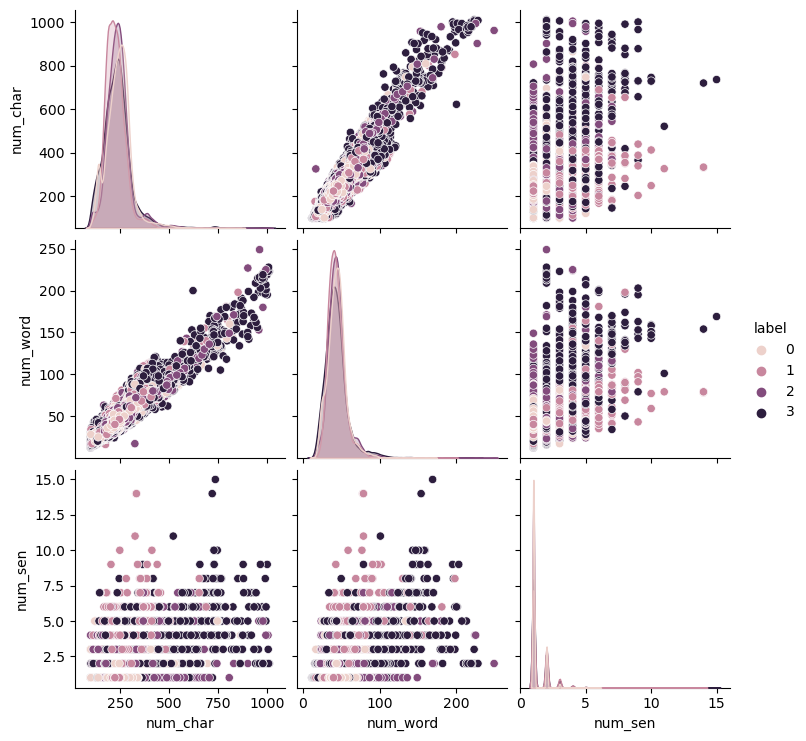

In [26]:
sns.pairplot(df,hue='label')

In [27]:
df.corr()

C:\Users\Nithin V\AppData\Local\Temp\ipykernel_7432\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,label,num_char,num_word,num_sen
label,1.000000,0.000915,0.001717,0.063592
num_char,0.000915,1.000000,0.928549,0.297039
num_word,0.001717,0.928549,1.000000,0.361218
num_sen,0.063592,0.297039,0.361218,1.000000


C:\Users\Nithin V\AppData\Local\Temp\ipykernel_7432\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

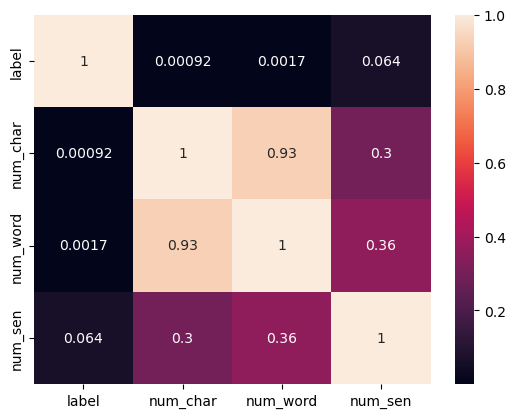

In [28]:
sns.heatmap(df.corr(),annot=True)

# Data Processing 

In [29]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [30]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stop_words and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [31]:
df['transformed_text']=df['text'].apply(transform_text)

In [32]:
df.head()

,text,label,num_char,num_word,num_sen,transformed_text
0,Wall St. Bears Claw Back Into the Black (Reute...,2,144,27,1,wall bear claw back black reuter reuter wall s...
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2,266,42,1,carlyl look toward commerci aerospac reuter re...
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2,232,40,1,oil economi cloud stock outlook reuter reuter ...
3,Iraq Halts Oil Exports from Main Southern Pipe...,2,256,40,1,iraq halt oil export main southern pipelin reu...
4,"Oil prices soar to all-time record, posing new...",2,234,43,1,oil price soar record pose new menac us econom...


In [33]:
df.head()

,text,label,num_char,num_word,num_sen,transformed_text
0,Wall St. Bears Claw Back Into the Black (Reute...,2,144,27,1,wall bear claw back black reuter reuter wall s...
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2,266,42,1,carlyl look toward commerci aerospac reuter re...
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2,232,40,1,oil economi cloud stock outlook reuter reuter ...
3,Iraq Halts Oil Exports from Main Southern Pipe...,2,256,40,1,iraq halt oil export main southern pipelin reu...
4,"Oil prices soar to all-time record, posing new...",2,234,43,1,oil price soar record pose new menac us econom...


In [34]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white")

In [35]:
sport_wc=wc.generate(df[df['label']==1]['transformed_text'].str.cat(sep=" "))

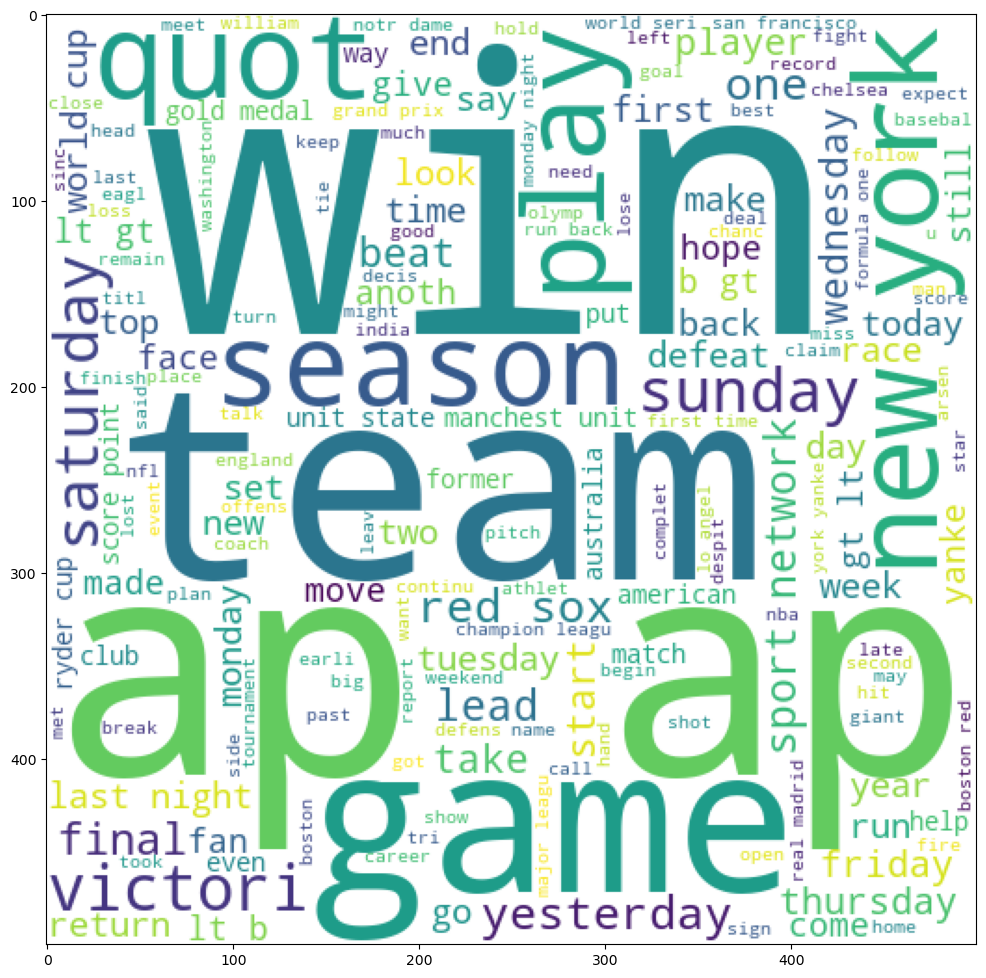

In [36]:
plt.figure(figsize=(12,15))
plt.imshow(sport_wc)

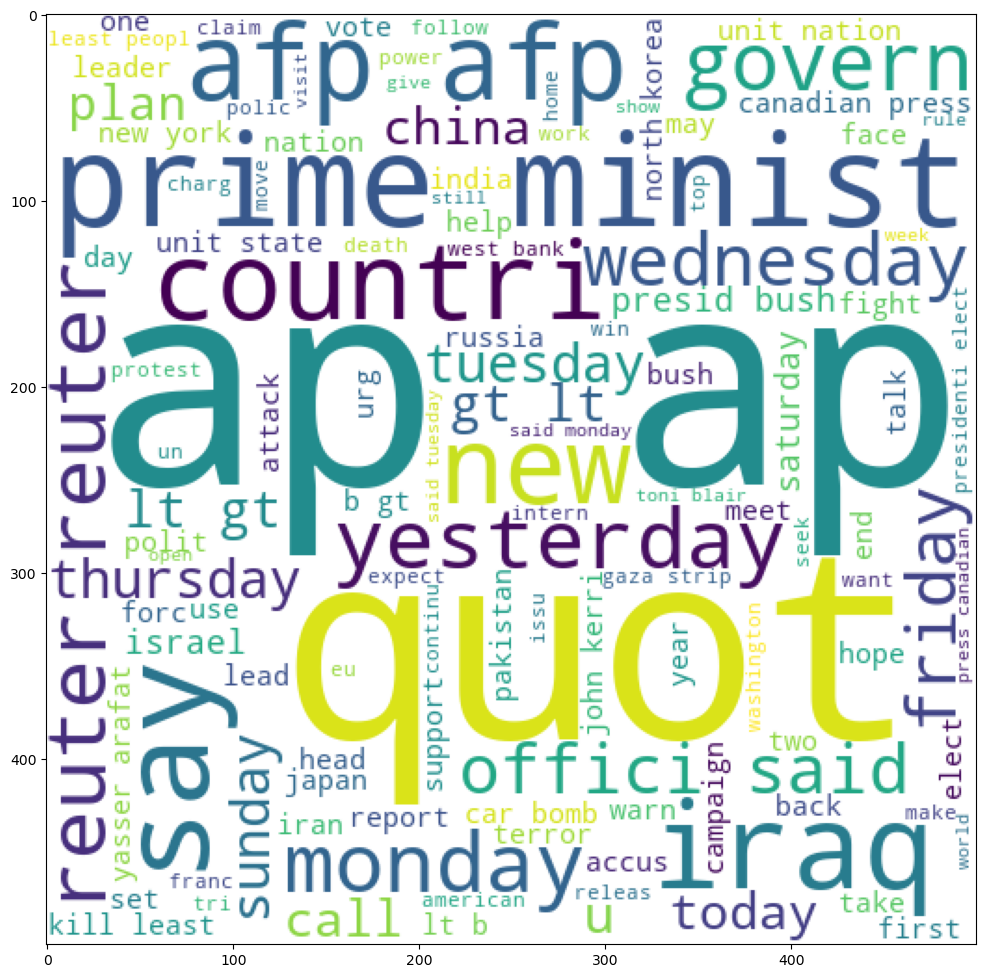

In [37]:
word_wc=wc.generate(df[df['label']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,15))
plt.imshow(word_wc)

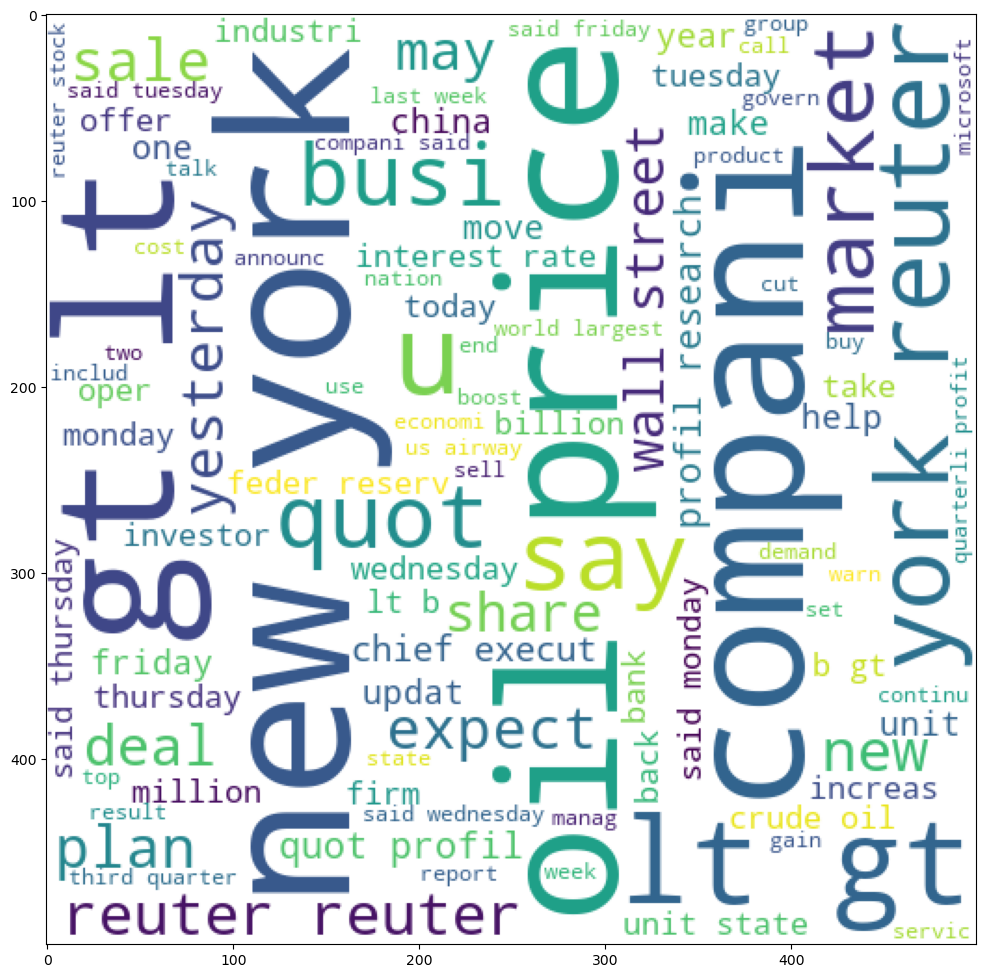

In [38]:
business_wc=wc.generate(df[df['label']==2]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,15))
plt.imshow(business_wc)

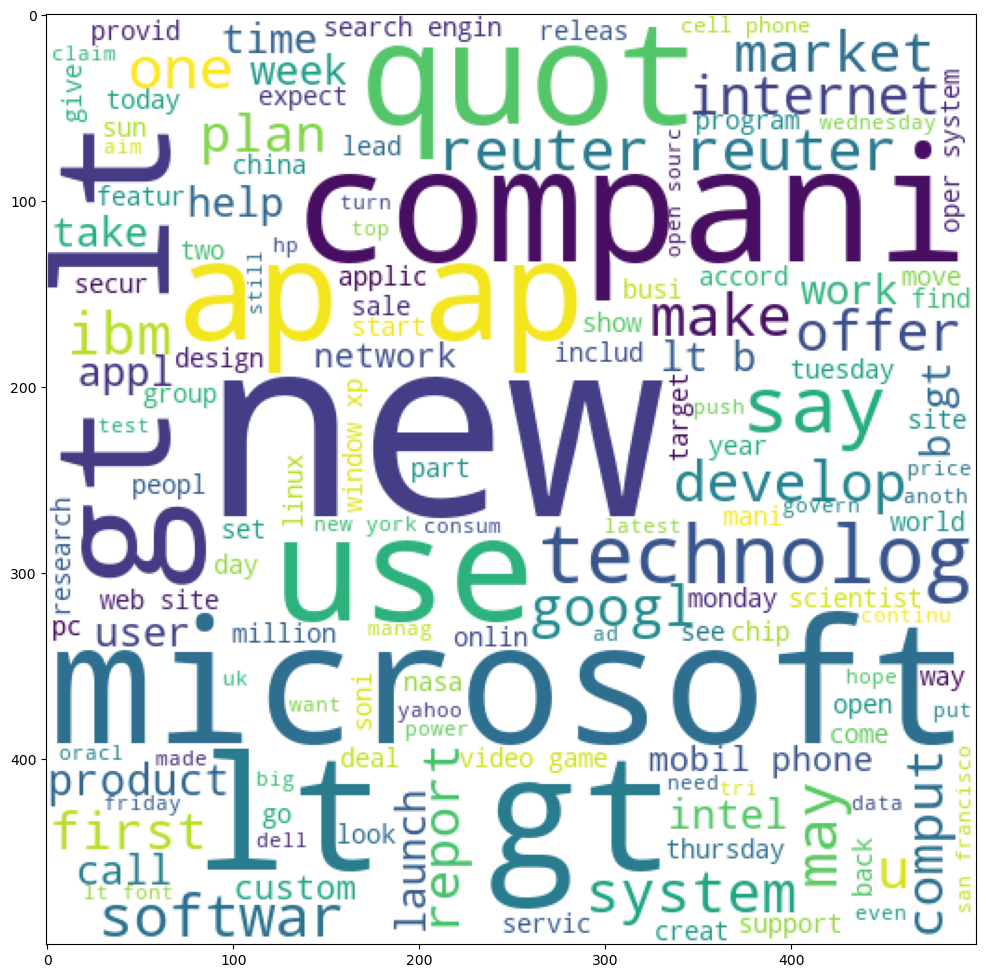

In [39]:
SciTech_wc=wc.generate(df[df['label']==3]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,15))
plt.imshow(SciTech_wc)

In [40]:
word_corpus=[]
sport_corpus=[]
business_corpus=[]
scitech_corpus=[]

In [41]:
for i in range(4):
    for msg in df[df['label']==i]['transformed_text'].tolist():
        for word in msg.split():
            if i == 0:
                word_corpus.append(word)
            elif i == 1:
                sport_corpus.append(word)
            elif i == 2:
                business_corpus.append(word)
            else:
                scitech_corpus.append(word)

In [42]:
len(scitech_corpus)

730919

In [43]:
len(business_corpus)

753529

In [44]:
len(sport_corpus)

725048

In [45]:
len(word_corpus)

773736

In [46]:
from collections import Counter

In [47]:
Counter(word_corpus).most_common(30)

[('39', 8914),
 ('said', 7663),
 ('iraq', 5828),
 ('kill', 5801),
 ('ap', 5757),
 ('reuter', 5406),
 ('presid', 4388),
 ('us', 3804),
 ('minist', 3575),
 ('new', 3458),
 ('say', 3408),
 ('afp', 3385),
 ('two', 3339),
 ('offici', 3107),
 ('elect', 3046),
 ('leader', 2964),
 ('peopl', 2864),
 ('attack', 2776),
 ('iraqi', 2772),
 ('govern', 2755),
 ('quot', 2690),
 ('bomb', 2639),
 ('palestinian', 2593),
 ('bush', 2580),
 ('nation', 2515),
 ('state', 2441),
 ('prime', 2346),
 ('report', 2291),
 ('secur', 2267),
 ('baghdad', 2253)]

In [48]:
Counter(sport_corpus).most_common(30)

[('39', 14788),
 ('ap', 6245),
 ('game', 5310),
 ('win', 5161),
 ('new', 4112),
 ('team', 4048),
 ('first', 3907),
 ('season', 3413),
 ('night', 3113),
 ('world', 3003),
 ('lead', 2837),
 ('victori', 2824),
 ('last', 2795),
 ('cup', 2766),
 ('one', 2728),
 ('leagu', 2713),
 ('coach', 2695),
 ('two', 2662),
 ('year', 2565),
 ('sunday', 2551),
 ('open', 2407),
 ('olymp', 2367),
 ('quot', 2349),
 ('final', 2343),
 ('play', 2330),
 ('player', 2303),
 ('sport', 2294),
 ('champion', 2177),
 ('saturday', 2129),
 ('second', 2116)]

In [49]:
Counter(business_corpus).most_common(30)

[('39', 11728),
 ('said', 7229),
 ('reuter', 6899),
 ('new', 6564),
 ('oil', 6246),
 ('us', 5722),
 ('compani', 5421),
 ('price', 5374),
 ('gt', 5253),
 ('lt', 5233),
 ('stock', 4273),
 ('profit', 3713),
 ('year', 3482),
 ('percent', 3364),
 ('york', 3330),
 ('sale', 3322),
 ('report', 3311),
 ('quot', 3124),
 ('share', 3036),
 ('million', 2953),
 ('market', 2700),
 ('monday', 2600),
 ('billion', 2574),
 ('wednesday', 2556),
 ('tuesday', 2528),
 ('thursday', 2464),
 ('bank', 2463),
 ('cut', 2375),
 ('friday', 2342),
 ('plan', 2298)]

In [50]:
Counter(scitech_corpus).most_common(30)

[('39', 8986),
 ('new', 7099),
 ('microsoft', 5113),
 ('gt', 4456),
 ('lt', 4441),
 ('compani', 4105),
 ('ap', 3683),
 ('softwar', 3604),
 ('said', 3603),
 ('servic', 3368),
 ('reuter', 3266),
 ('internet', 3229),
 ('comput', 3160),
 ('quot', 2895),
 ('year', 2794),
 ('system', 2623),
 ('technolog', 2538),
 ('use', 2486),
 ('secur', 2452),
 ('search', 2354),
 ('space', 2346),
 ('launch', 2301),
 ('announc', 2286),
 ('phone', 2252),
 ('say', 2240),
 ('world', 2189),
 ('first', 2152),
 ('music', 2129),
 ('plan', 2055),
 ('onlin', 2022)]

# Model Building

In [51]:
df.head()

,text,label,num_char,num_word,num_sen,transformed_text
0,Wall St. Bears Claw Back Into the Black (Reute...,2,144,27,1,wall bear claw back black reuter reuter wall s...
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2,266,42,1,carlyl look toward commerci aerospac reuter re...
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2,232,40,1,oil economi cloud stock outlook reuter reuter ...
3,Iraq Halts Oil Exports from Main Southern Pipe...,2,256,40,1,iraq halt oil export main southern pipelin reu...
4,"Oil prices soar to all-time record, posing new...",2,234,43,1,oil price soar record pose new menac us econom...


In [106]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv=CountVectorizer(max_features=3000)
tfidf=TfidfVectorizer(max_features=3000)

In [107]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [108]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [109]:
X.shape

(120000, 3000)

In [110]:
y=df['label'].values

In [111]:
y

array([2, 2, 2, ..., 1, 1, 1], dtype=int64)

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=2)

In [114]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [115]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [116]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1,average='weighted'))

0.8535416666666666
[[4914  460  405  272]
 [  89 5777   49   54]
 [ 194  198 4928  647]
 [ 244  213  690 4866]]
0.8544027135564408


In [117]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2,average='weighted'))

0.885875
[[5334  221  303  193]
 [  82 5800   36   51]
 [ 210   76 5042  639]
 [ 294  108  526 5085]]
0.8853330117372452


In [118]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3,average='weighted'))

0.8815833333333334
[[5312  224  298  217]
 [  83 5788   47   51]
 [ 243   86 4929  709]
 [ 298  110  476 5129]]
0.8810823872135702


In [ ]:
#Tfidf -> mnb

In [120]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))